Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Street', 'CentralAir'],
      dtype='object')
Feature: 0, Score: -165.32738
Feature: 1, Score: -10.93222
Feature: 2, Score: 0.39333
Feature: 3, Score: 17780.97136
Feature: 4, Score: 5163.61288
Feature: 5, Score: 361.69851
Feature: 6, Score: 104.68334
Feature: 7, Score: 31.98196
Feature: 8, Score: 10.13199
Feature: 9, Score: -0.07377
Feature: 10, Score: -0.73542
Feature: 11, Score: 9.32280
Feature: 12, Score: 23.56978
Feature: 

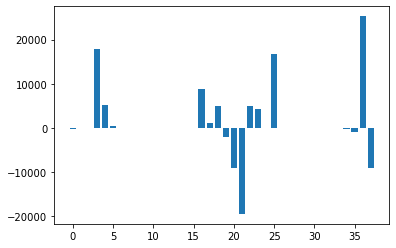

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None


all_data = pd.read_csv('data.csv')
data_num = len(all_data)

fold_num = 5
k_fold = data_num // fold_num


#for feature importance
temp_data = all_data.iloc[:]
numeral_temp_data = temp_data._get_numeric_data()
numeral_temp_data = numeral_temp_data.drop(columns='Id')
numeral_temp_data['Street'] = temp_data['Street']
numeral_temp_data['CentralAir'] = temp_data['CentralAir']

numeral_temp_data.Street[numeral_temp_data.Street == 'Pave'] = 1
numeral_temp_data.Street[numeral_temp_data.Street == 'Grvl'] = 0

numeral_temp_data.CentralAir[numeral_temp_data.CentralAir == 'Y'] = 1
numeral_temp_data.CentralAir[numeral_temp_data.CentralAir == 'N'] = 0
numeral_temp_data = numeral_temp_data.fillna(0)
print(numeral_temp_data.columns)

validation_set = numeral_temp_data.iloc[0*k_fold:(1)*k_fold]
index_list = validation_set.index
training_set = numeral_temp_data.drop(index_list)

X_train = training_set.iloc[:].drop(columns='SalePrice')
y_train = training_set.iloc[:]['SalePrice']
X_test = validation_set.iloc[:].drop(columns='SalePrice')
y_test = validation_set.iloc[:]["SalePrice"]

model = LinearRegression()
model.fit(X_train,y_train)
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



    
    
    
    
    


In [11]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import ReLU, LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import callbacks
import tensorflow as tf

def train_nn(numeral_temp_data,i,k_fold):
    


    
    first_layer_neurons = 512
    second_layer_neurons = 512
    third_layer_neurons = 512

    n_inputs = 38
    n_outputs = 1
    
    
    # define encoder

    visible = Input(shape=(n_inputs,))
    e = Dense(first_layer_neurons)(visible)
    e = BatchNormalization()(e)
    e = LeakyReLU()(e)
    
    e = Dense(second_layer_neurons)(e)
    e = BatchNormalization()(e)
    e = LeakyReLU()(e)
        
    e = Dense(third_layer_neurons)(e)
    e = BatchNormalization()(e)
    e = LeakyReLU()(e)
    
    
    output = Dense(n_outputs, activation='linear')(e)
    
    model = Model(inputs=visible, outputs=output)
    loss_function = 'mae'
    model.compile(optimizer='adam', loss= loss_function)
    callback = callbacks.EarlyStopping(monitor='loss', patience=10)
    
    validation_set = numeral_temp_data.iloc[i*k_fold:(i+1)*k_fold]
    index_list = validation_set.index
    training_set = numeral_temp_data.drop(index_list)
    
    X_train = training_set.iloc[:].drop(columns='SalePrice')
    y_train = training_set.iloc[:]['SalePrice']
    X_test = validation_set.iloc[:].drop(columns='SalePrice')
    y_test = validation_set.iloc[:]["SalePrice"]
    
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    data = numeral_temp_data.drop(columns='SalePrice')
    target = numeral_temp_data['SalePrice']
    
    x_scaler.fit(data)
    target = target.values.reshape(-1,1)
    y_scaler.fit(target)
    
    X_train = x_scaler.transform(X_train)
    y_train = y_scaler.transform(y_train.values.reshape(-1,1))
    X_test = x_scaler.transform(X_test)
    y_test = y_scaler.transform(y_test.values.reshape(-1,1))
    
    model.fit(X_train,y_train, epochs=150, batch_size=4)
    pred = model.predict(X_test)
    pred = y_scaler.inverse_transform(pred)
    y_test = y_scaler.inverse_transform(y_test)
    mape = mean_absolute_percentage_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred)**0.5
    print("result of nn: mape {} rmse {} ".format(mape,rmse))


for i in range(fold_num):
    print('{} fold'.format(i+1))
    temp_data = all_data.iloc[:]
    numeral_temp_data = temp_data._get_numeric_data()
    numeral_temp_data = numeral_temp_data.drop(columns='Id')
    numeral_temp_data['Street'] = temp_data['Street']
    numeral_temp_data['CentralAir'] = temp_data['CentralAir']
    
    numeral_temp_data.Street[numeral_temp_data.Street == 'Pave'] = 1
    numeral_temp_data.Street[numeral_temp_data.Street == 'Grvl'] = 0
    
    numeral_temp_data.CentralAir[numeral_temp_data.CentralAir == 'Y'] = 1
    numeral_temp_data.CentralAir[numeral_temp_data.CentralAir == 'N'] = 0
    numeral_temp_data = numeral_temp_data.fillna(0)
    
    validation_set = numeral_temp_data.iloc[i*k_fold:(i+1)*k_fold]
    index_list = validation_set.index
    training_set = numeral_temp_data.drop(index_list)
    
    X_train = training_set.iloc[:].drop(columns='SalePrice')
    y_train = training_set.iloc[:]['SalePrice']
    X_test = validation_set.iloc[:].drop(columns='SalePrice')
    y_test = validation_set.iloc[:]["SalePrice"]
    
    
    
    knn = KNeighborsRegressor()
    adaboost = AdaBoostRegressor()
    decisiontree = DecisionTreeRegressor()
    randomforest = RandomForestRegressor()
    linear = LinearRegression()
    
    knn.fit(X_train,y_train)
    adaboost.fit(X_train,y_train)
    decisiontree.fit(X_train,y_train)
    randomforest.fit(X_train,y_train)
    linear.fit(X_train,y_train)
    
    knn_pred = knn.predict(X_test)
    adaboost_pred = adaboost.predict(X_test)
    decisiontree_pred = decisiontree.predict(X_test)
    randomforest_pred = randomforest.predict(X_test)
    linear_pred = linear.predict(X_test)
    
    train_nn(numeral_temp_data,i,k_fold)
    
    mape_list = []
    rmse_list = []
    name_list = ['Knn','Adaboost','Decisiontree','Randomforest','Linear']
    
    knn_mape = mean_absolute_percentage_error(knn_pred, y_test)
    adaboost_mape = mean_absolute_percentage_error(adaboost_pred, y_test)
    decisiontree_mape = mean_absolute_percentage_error(decisiontree_pred, y_test)
    randomforest_mape = mean_absolute_percentage_error(randomforest_pred, y_test)
    linear_mape = mean_absolute_percentage_error(linear_pred, y_test)
    
    mape_list = [knn_mape, adaboost_mape, decisiontree_mape, randomforest_mape, linear_mape]
    
    knn_rmse = mean_squared_error(knn_pred, y_test) ** 0.5
    adaboost_rmse = mean_squared_error(adaboost_pred, y_test) ** 0.5
    decisiontree_rmse = mean_squared_error(decisiontree_pred, y_test) ** 0.5
    randomforest_rmse = mean_squared_error(randomforest_pred, y_test) ** 0.5
    linear_rmse = mean_squared_error(linear_pred, y_test) ** 0.5
    
    rmse_list = [knn_rmse, adaboost_rmse, decisiontree_rmse, randomforest_rmse, linear_rmse]


    
    
    
    #plt.subplot(2,1,1)
    #plt.bar(name_list,mape_list,color='green')
    #plt.xlabel("MAPE")
    
    #plt.subplot(2,1,2)
    #plt.bar(name_list,rmse_list,color='blue')
    #plt.xlabel("RMSE")
    #plt.show()
    
    print("result of knn: mape {} rmse {} ".format(knn_mape,knn_rmse))
    print("result of adaboost: mape {} rmse {} ".format(adaboost_mape,adaboost_rmse))
    print("result of decisiontree: mape {} rmse {} ".format(decisiontree_mape,decisiontree_rmse))
    print("result of randomforest: mape {} rmse {} ".format(randomforest_mape,randomforest_rmse))
    print("result of linear: mape {} rmse {} ".format(linear_mape,linear_rmse))
    
    
    

1 fold
Epoch 1/150
292/292 [==============================] - 1s 1ms/step - loss: 0.6649
Epoch 2/150
292/292 [==============================] - 0s 1ms/step - loss: 0.2203
Epoch 3/150
292/292 [==============================] - 0s 1ms/step - loss: 0.1359
Epoch 4/150
292/292 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 5/150
292/292 [==============================] - 0s 1ms/step - loss: 0.1067
Epoch 6/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0976
Epoch 7/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0934
Epoch 8/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0991
Epoch 9/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0955
Epoch 10/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0907
Epoch 11/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0852
Epoch 12/150
292/292 [==============================] - 0s 1ms/step - loss: 0.0831
Epoch 

KeyboardInterrupt: 

In [27]:
#離群值相關
from scipy import stats

#show feature boxplot
features = numeral_temp_data.columns
features = features.tolist()
features.remove('Street')
features.remove('CentralAir')
#for i in features:
#    print(i)
#    z = np.abs(stats.zscore(temp_data[i]))
#    plt.boxplot(z)
#    plt.show()
    
#before remove outlier
validation_set = numeral_temp_data.iloc[0*k_fold:(1)*k_fold]
index_list = validation_set.index
training_set = numeral_temp_data.drop(index_list)

X_train = training_set.iloc[:].drop(columns='SalePrice')
y_train = training_set.iloc[:]['SalePrice']
X_test = validation_set.iloc[:].drop(columns='SalePrice')
y_test = validation_set.iloc[:]["SalePrice"]

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
mape = mean_absolute_percentage_error(pred, y_test)
rmse = mean_squared_error(pred, y_test) ** 0.5
print("mape(before drop outliers):",mape)
print("rmse(before drop outliers):",rmse)

#after remove outlier(以saleprice為例)
percentile25 = y_train.quantile(0.25)
percentile75 = y_train.quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

upper_outlier_index = y_train[y_train > upper_limit].index
lower_outlier_index = y_train[y_train < lower_limit].index

X_train = X_train.drop(index=upper_outlier_index)
X_train = X_train.drop(index=lower_outlier_index)
y_train = y_train.drop(index=upper_outlier_index)
y_train = y_train.drop(index=lower_outlier_index)

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
mape = mean_absolute_percentage_error(pred, y_test)
rmse = mean_squared_error(pred, y_test) ** 0.5
print("mape(after drop outliers):",mape)
print("rmse(after drop outliers):",rmse)


mape(before drop outliers): 0.12721893939058315
rmse(before drop outliers): 28207.114743929003
mape(after drop outliers): 0.11733509522454112
rmse(after drop outliers): 31826.709442712443
